# AICE Professioanl 대비 - 이미지 처리(CNN, Transfer-Learning) 실습
- 고양이 vs 개 (Cats vs Dogs) 데이터셋:
이 데이터셋은 이진 분류를 위한 대표적인 이미지 데이터셋으로, TensorFlow Datasets에서 Load 가능

## 모델링 순서

**1. 데이터 로드 및 공통 전처리**
- train_data, validation_data Load
- 데이터 시각화
- Preprocess -> /.255(정규화)

**2. 기본 CNN 모델**
- 2.1 CNN 모델링
- 2.2 CNN 모델 평가 및 예측
- 2.3 CNN 모델 예측결과 시각화

**3. Transfer Learninig-VGG**
- 3.1 VGG16 모델링
- 3.2 VGG16 모델 평가 및 예측
- 3.3 VGG16 모델 예측결과 시각화

**4. Transfer Learninig-MobileNET**
- 4.1 MobileNetV2 모델링
- 4.2 MobileNetV2 모델 평가 및 예측
- 4.3 MobileNetV2 모델 예측결과 시각화

**5. Tensorflow - image_dataset_from_directory, ImageDataGenerator 활용 모델링**
- 5.1 image_dataset_from_directory Data Load
- 5.2 기본CNN, MobileNetV2 모델링/평가/예측/시각화
- 5.3 image data generator 활용 Data Augmentation
- 5.4 Augmented Dataset 기반 기본CNN 모델 성능개선 평가



# 5. Tensorflow - image_dataset_from_directory, ImageDataGenerator 활용 모델링
## 5.1 image_dataset_from_directory Data Load


In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import os
import shutil

In [ ]:
# 이미지 크기 및 배치 사이즈 설정
IMG_SIZE = 224  # 향후 실습에서 VGG, MobileNet Pre-trained Model은 224,224 input size
BATCH_SIZE = 64

# 데이터셋 다운로드 및 로드
dataset_name = 'cats_vs_dogs'
dataset, metadata = tfds.load(dataset_name, split=['train'], with_info=True, as_supervised=True)
raw_train = dataset[0]


# 로컬 저장 경로 설정
DATASET_PATH = './cats_and_dogs'
train_dir = os.path.join(DATASET_PATH, 'train')
cat_dir = os.path.join(train_dir, 'cats')
dog_dir = os.path.join(train_dir, 'dogs')

# 데이터셋 디렉토리 준비 (폴더가 이미 있으면 삭제 후 생성)
if os.path.exists(DATASET_PATH):
    shutil.rmtree(DATASET_PATH)
os.makedirs(cat_dir)
os.makedirs(dog_dir)

# 이미지 저장 함수 정의
def save_image(image, label, image_id):
    label_name = 'cats' if label == 0 else 'dogs'
    directory = cat_dir if label == 0 else dog_dir
    filename = f'{label_name}_{image_id}.jpg'
    file_path = os.path.join(directory, filename)
    tf.keras.preprocessing.image.save_img(file_path, image)

# 이미지 저장 (각 클래스 별로 이미지 저장)
for i, (image, label) in enumerate(raw_train):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE)).numpy()
    save_image(image, label, i)

print(f'Data saved to: {DATASET_PATH}')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.Y1MR54_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


In [ ]:
DATASET_PATH = './cats_and_dogs/train'
DATASET_PATH

'./cats_and_dogs/train'

In [ ]:
# 이미지 크기 및 배치 사이즈 설정
IMG_SIZE = 224  # 향후 실습에서 VGG, MobileNet Pre-trained Model은 224,224 input size
BATCH_SIZE = 64

# 데이터셋 로드: tensorflow의 image_dataset_from_directory를 사용
train_dataset = tf.keras.preprocessing."""입력하세요"""(
    DATASET_PATH,
    validation_split=0.2,
    subset=""""입력하세요"""",
    seed=123,  # 랜덤 시드를 고정하여 재현성 확보
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE
)

validation_dataset = tf.keras.preprocessing."""입력하세요"""(
    DATASET_PATH,
    validation_split=0.2,
    subset=""""입력하세요"""",
    seed=123,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE
)

Found 23262 files belonging to 2 classes.
Using 18610 files for training.
Found 23262 files belonging to 2 classes.
Using 4652 files for validation.


In [ ]:
# 데이터셋 구조 확인
class_names = train_dataset.class_names
print(f'Class names: {class_names}')


Class names: ['cats', 'dogs']


In [ ]:
# 데이터셋 전처리: 이미지 정규화 (0~1 범위로)
normalization_layer = tf.keras.layers."""입력하세요"""(1./255)

train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
validation_dataset = validation_dataset.map(lambda x, y: (normalization_layer(x), y))

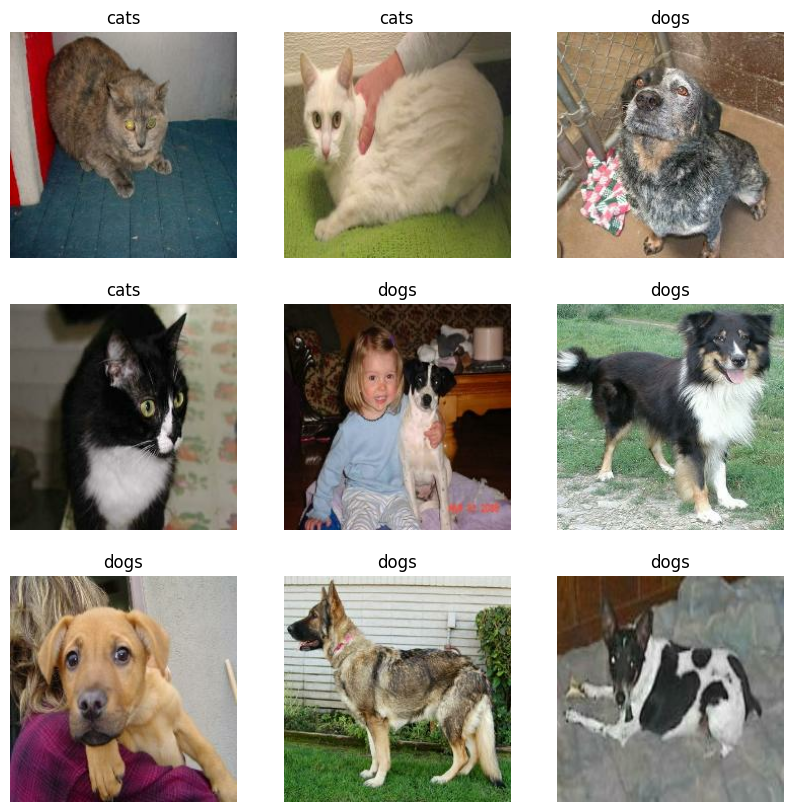

In [ ]:
# 일부 이미지를 시각화하여 확인
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy())
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()

In [ ]:
# # Prefetching 및 성능 최적화를 위한 설정
# AUTOTUNE = tf.data.AUTOTUNE
# train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
# validation_dataset = validation_dataset.cache().prefetch(buffer_size=AUTOTUNE)

## 5.2 기본CNN, MobileNetV2 모델링/평가/예측/시각화
### 기본 CNN 모델

In [ ]:
# 기본 CNN 모델 정의
cnn_model = models.Sequential([
    # layers.Rescaling(1. / 255),  # 이미지 Rescaling 필수
    layers."""입력하세요"""(32, (3, 3), activation='relu', input_shape=("""입력하세요""", """입력하세요""", 3)),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification: Cats vs Dogs
])

# 모델 컴파일
cnn_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

# 모델 요약 정보 출력
cnn_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       9,437,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,679,041 (36.92 MB)

 Trainable params: 9,679,041 (36.92 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# 조기종료 콜백함수 정의(EarlyStopping)
es = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

# 체크포인트 저장(ModelCheckpoint)
checkpoint_path = 'tmp_checkpoint.keras'
cp = ModelCheckpoint(filepath = checkpoint_path, monitor='val_loss', verbose=1, save_best_only=True)

# 모델 학습
history_cnn = cnn_model.fit(train_dataset, validation_data=validation_dataset, epochs=10, batch_size=BATCH_SIZE, callbacks=[es, cp], verbose=1)

Epoch 1/10
291/291 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5537 - loss: 0.6931
Epoch 1: val_loss improved from inf to 0.52059, saving model to tmp_checkpoint.keras
291/291 ━━━━━━━━━━━━━━━━━━━━ 19s 41ms/step - accuracy: 0.5540 - loss: 0.6929 - val_accuracy: 0.7367 - val_loss: 0.5206
Epoch 2/10
289/291 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7472 - loss: 0.5172
Epoch 2: val_loss improved from 0.52059 to 0.44844, saving model to tmp_checkpoint.keras
291/291 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.7474 - loss: 0.5170 - val_accuracy: 0.7917 - val_loss: 0.4484
Epoch 3/10
289/291 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7918 - loss: 0.4450
Epoch 3: val_loss improved from 0.44844 to 0.44220, saving model to tmp_checkpoint.keras
291/291 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.7919 - loss: 0.4448 - val_accuracy: 0.8007 - val_loss: 0.4422
Epoch 4/10
289/291 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8293 - loss: 0.3822
Epoch 4: val_loss improved from 0.

In [ ]:
# 모델 평가
loss, accuracy = cnn_model.evaluate(validation_dataset)
print(f'image_dataset_from_directory활용 기본 CNN 모델 정확도: {accuracy}')

73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8600 - loss: 0.5495
image_dataset_from_directory활용 기본 CNN 모델 정확도: 0.8568357825279236


In [ ]:
# 검증 데이터에서 일부 이미지 예측 및 시각화
import numpy as np

# 배치를 해제하여 개별 이미지와 레이블을 가져옵니다.
validation_unbatched = validation_dataset.unbatch()

# 검증 데이터에서 처음 10개 이미지 가져오기
sample_images = []
sample_labels = []
for image, label in validation_unbatched.take(10):
    sample_images.append(image.numpy())
    sample_labels.append(label.numpy())

# 이미지 배열로 변환
sample_images = np.array(sample_images)
sample_labels = np.array(sample_labels)

# 예측 수행
predictions = cnn_model.predict(sample_images)

# 예측 결과 시각화
for i in range(len(sample_images)):
    plt.figure()
    plt.imshow(sample_images[i])
    predicted_label = 'Dog' if predictions[i] > 0.5 else 'Cat'
    true_label = 'Dog' if sample_labels[i] == 1 else 'Cat'
    plt.title(f'Pred: {predicted_label} / True: {true_label}')
    plt.axis('off')
    plt.show()

### MobileNetV2 모델

In [ ]:
# MobileNetV2 모델 불러오기 (사전 훈련된 가중치 사용)
mobilenet_base = tf.keras.applications."""입력하세요"""(input_shape=(IMG_SIZE, IMG_SIZE, 3),
                                                   include_top=False,
                                                   weights='imagenet')

# 사전 학습된 층을 고정
mobilenet_base.trainable = False

# MobileNet을 이용한 모델 구축
mobilenet_model = models.Sequential([
    """입력하세요""",
    layers.GlobalAveragePooling2D(),
    layers.Dense(1, activation='sigmoid')
])

# 모델 컴파일
mobilenet_model.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# 조기종료 콜백함수 정의(EarlyStopping)
es = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

# 체크포인트 저장(ModelCheckpoint)
checkpoint_path = 'tmp_checkpoint.keras'
cp = ModelCheckpoint(filepath = checkpoint_path, monitor='val_loss', verbose=1, save_best_only=True)

# 모델 학습
history_mobilenetV2 = mobilenet_model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=10,
    batch_size=BATCH_SIZE,
    callbacks=[es, cp],
    verbose=1
)

Epoch 1/10
291/291 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9434 - loss: 0.1649
Epoch 1: val_loss improved from inf to 0.05221, saving model to tmp_checkpoint.keras
291/291 ━━━━━━━━━━━━━━━━━━━━ 24s 52ms/step - accuracy: 0.9434 - loss: 0.1647 - val_accuracy: 0.9850 - val_loss: 0.0522
Epoch 2/10
291/291 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9806 - loss: 0.0531
Epoch 2: val_loss improved from 0.05221 to 0.04437, saving model to tmp_checkpoint.keras
291/291 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.9806 - loss: 0.0531 - val_accuracy: 0.9867 - val_loss: 0.0444
Epoch 3/10
291/291 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9834 - loss: 0.0448
Epoch 3: val_loss improved from 0.04437 to 0.04171, saving model to tmp_checkpoint.keras
291/291 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.9834 - loss: 0.0448 - val_accuracy: 0.9865 - val_loss: 0.0417
Epoch 4/10
291/291 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9850 - loss: 0.0414
Epoch 4: val_loss did not improve 

In [ ]:
# 모델 평가
loss, accuracy = mobilenet_model.evaluate(validation_dataset)
print(f'image_dataset_from_directory활용 MobileNetV2 모델 정확도: {accuracy}')

73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9827 - loss: 0.0408
image_dataset_from_directory활용 MobileNetV2 모델 정확도: 0.9838778972625732


In [ ]:
# 검증 데이터에서 일부 이미지 예측 및 시각화
import numpy as np

# 배치를 해제하여 개별 이미지와 레이블을 가져옵니다.
validation_unbatched = validation_dataset.unbatch()

# 검증 데이터에서 처음 10개 이미지 가져오기
sample_images = []
sample_labels = []
for image, label in validation_unbatched.take(10):
    sample_images.append(image.numpy())
    sample_labels.append(label.numpy())

# 이미지 배열로 변환
sample_images = np.array(sample_images)
sample_labels = np.array(sample_labels)

# 예측 수행
predictions = mobilenet_model.predict(sample_images)

# 예측 결과 시각화
for i in range(len(sample_images)):
    plt.figure()
    plt.imshow(sample_images[i])
    predicted_label = 'Dog' if predictions[i] > 0.5 else 'Cat'
    true_label = 'Dog' if sample_labels[i] == 1 else 'Cat'
    plt.title(f'Pred: {predicted_label} / True: {true_label}')
    plt.axis('off')
    plt.show()



---



## 참고사항 - 5.3 Tensorflow image data generator 활용 Data Augmentation

In [ ]:
DATASET_PATH

'./cats_and_dogs/train'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 데이터 증강을 위한 ImageDataGenerator 생성
train_datagen = ImageDataGenerator(
    rescale=1./255,            # 0~1 범위로 정규화
    rotation_range=40,          # 이미지 회전 범위
    width_shift_range=0.2,      # 수평 이동 범위
    height_shift_range=0.2,     # 수직 이동 범위
    shear_range=0.2,            # 전단 변환 범위
    zoom_range=0.2,             # 확대/축소 범위
    horizontal_flip=True,       # 이미지 좌우 반전
    fill_mode='nearest',        # 빈 픽셀을 채우는 방식
    validation_split=0.2        # 검증 데이터셋으로 20%를 분리
)

# 검증 데이터셋은 증강 없이 정규화만 수행
validation_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [ ]:
# 증강된 학습 데이터셋 로드
train_generator = train_datagen.flow_from_directory(
    DATASET_PATH,               # 이미지 경로
    target_size=(IMG_SIZE, IMG_SIZE),  # 이미지 크기 조정
    batch_size=BATCH_SIZE,      # 배치 크기
    class_mode='binary',        # 이진 분류 (Cats vs Dogs)
    subset='training',          # 훈련용 데이터셋
    seed=123                    # 시드 고정
)

# 검증 데이터셋 로드
validation_generator = validation_datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',        # 이진 분류
    subset='validation',        # 검증용 데이터셋
    seed=123
)

# 출력 확인
print(f'Training samples found: {train_generator.samples}')
print(f'Validation samples found: {validation_generator.samples}')

Found 18611 images belonging to 2 classes.
Found 4651 images belonging to 2 classes.
Training samples found: 18611
Validation samples found: 4651


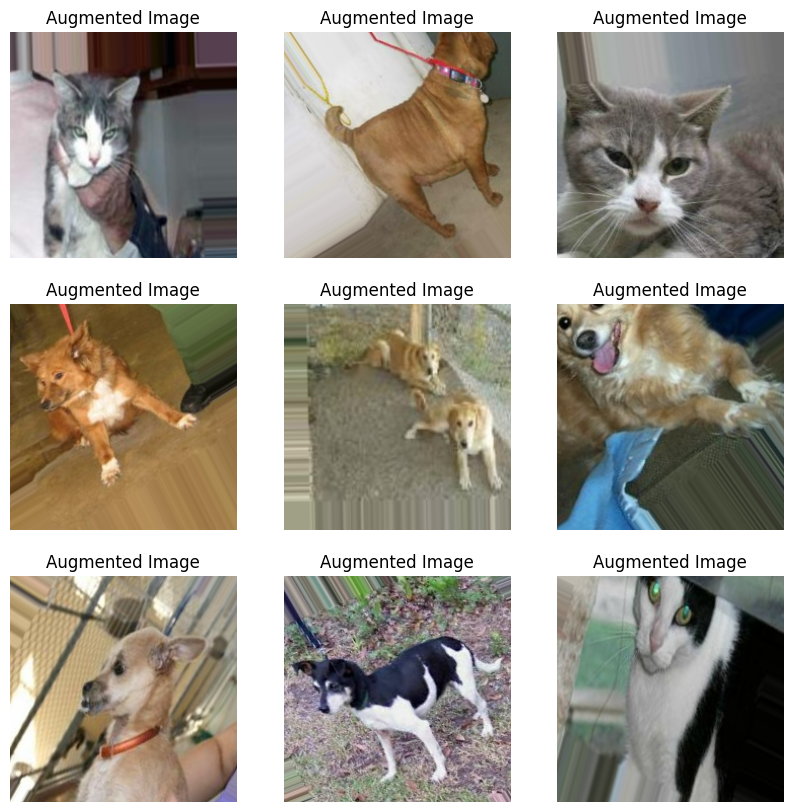

In [ ]:
# 증강된 이미지 시각화
import matplotlib.pyplot as plt

# 증강된 이미지들 중 일부를 시각화
x_batch, y_batch = next(train_generator)

plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(x_batch[i])
    plt.title("Augmented Image")
    plt.axis("off")
plt.show()

## 5.4 Augmented Dataset 기반 기본CNN 모델 성능개선 평가

In [ ]:
# 기본 CNN 모델 정의
cnn_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification: Cats vs Dogs
])

# 모델 컴파일
cnn_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
# 모델 요약 정보 출력
cnn_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 24, 24, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 512)                 │       9,437,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,679,041 (36.92 MB)

 Trainable params: 9,679,041 (36.92 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# 조기종료 콜백함수 정의(EarlyStopping)
es = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

# 체크포인트 저장(ModelCheckpoint)
checkpoint_path = 'tmp_checkpoint.keras'
cp = ModelCheckpoint(filepath = checkpoint_path, monitor='val_loss', verbose=1, save_best_only=True)

# 모델 학습
history_cnn = cnn_model.fit(train_generator, validation_data=validation_generator, epochs=20, batch_size=BATCH_SIZE, callbacks=[es, cp], verbose=1)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


290/291 ━━━━━━━━━━━━━━━━━━━━ 0s 661ms/step - accuracy: 0.5200 - loss: 0.7044
Epoch 1: val_loss improved from inf to 0.68306, saving model to tmp_checkpoint.keras
291/291 ━━━━━━━━━━━━━━━━━━━━ 207s 686ms/step - accuracy: 0.5200 - loss: 0.7043 - val_accuracy: 0.5498 - val_loss: 0.6831
Epoch 2/20
290/291 ━━━━━━━━━━━━━━━━━━━━ 0s 657ms/step - accuracy: 0.5823 - loss: 0.6749
Epoch 2: val_loss improved from 0.68306 to 0.63777, saving model to tmp_checkpoint.keras
291/291 ━━━━━━━━━━━━━━━━━━━━ 202s 678ms/step - accuracy: 0.5824 - loss: 0.6748 - val_accuracy: 0.6407 - val_loss: 0.6378
Epoch 3/20
290/291 ━━━━━━━━━━━━━━━━━━━━ 0s 659ms/step - accuracy: 0.6417 - loss: 0.6300
Epoch 3: val_loss improved from 0.63777 to 0.57450, saving model to tmp_checkpoint.keras
291/291 ━━━━━━━━━━━━━━━━━━━━ 202s 679ms/step - accuracy: 0.6418 - loss: 0.6299 - val_accuracy: 0.6857 - val_loss: 0.5745
Epoch 4/20
290/291 ━━━━━━━━━━━━━━━━━━━━ 0s 656ms/step - accuracy: 0.6955 - loss: 0.5811
Epoch 4: val_loss improved from 0

In [ ]:
# 모델 평가
loss, accuracy = cnn_model.evaluate(validation_generator)
print(f'Augmented Dataset활용 기본 CNN 모델 정확도: {accuracy}')

73/73 ━━━━━━━━━━━━━━━━━━━━ 6s 82ms/step - accuracy: 0.9170 - loss: 0.2043
Augmented Dataset활용 기본 CNN 모델 정확도: 0.9152870178222656


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 배치에서 일부 이미지와 레이블을 가져오기
sample_batch = next(validation_generator)  # validation_generator에서 배치 데이터 가져오기
sample_images, sample_labels = sample_batch

# 이미지와 레이블을 NumPy 배열로 변환
sample_images = np.array(sample_images)
sample_labels = np.array(sample_labels)

# CNN 모델을 사용하여 예측 수행
predictions = cnn_model.predict(sample_images)

# 예측 결과 시각화
for i in range(10):  # 첫 10개의 이미지를 예시로 시각화
    plt.figure()
    plt.imshow(sample_images[i])

    # 예측된 레이블
    predicted_label = 'Dog' if predictions[i] > 0.5 else 'Cat'
    # 실제 레이블
    true_label = 'Dog' if sample_labels[i] == 1 else 'Cat'

    plt.title(f'Pred: {predicted_label} / True: {true_label}')
    plt.axis('off')
    plt.show()
